# Preparando el conjunto de imágenes para aplicar PCA
Es una tecnica muy util para reducir la cantidad de dimensiones la cual estamos trabajando.

Esto nos ayudara cuando tengamos un conjunto de dimensiones muy grandes y lo que necesitamos es reducirlos para quedarnos por ejemplo el 80% de los datos.

Que variables debemos quedarnos para poder capturar esa informacion

In [1]:
%matplotlib inline

import numpy as np
import imageio
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
im = imageio.imread("./imagenes/s3/3.pgm")
im = im.astype(np.uint8)

print(im)

[[101 106 102 ... 108 107 108]
 [101 104 102 ... 106 108 105]
 [ 99 104 102 ... 108 106 111]
 ...
 [ 64  69  75 ...  42  48  48]
 [ 74  81  85 ...  46  48  44]
 [ 77  83  84 ...  46  50  45]]


## Evaluando el maximo y el minimo
Para despues normalizarla

In [3]:
print('Max original', end = ' ')
print(np.amax(im))
print('Min original', end = ' ')
print(np.amin(im))

Max original 204
Min original 10


## Normalizando nuestra imagen

In [4]:
im_original = im

im = im / 255

print('Max original', end = ' ')
print(np.amax(im))
print('Min original', end = ' ')
print(np.amin(im))

Max original 0.8
Min original 0.0392156862745098


## Mostrando la imagen

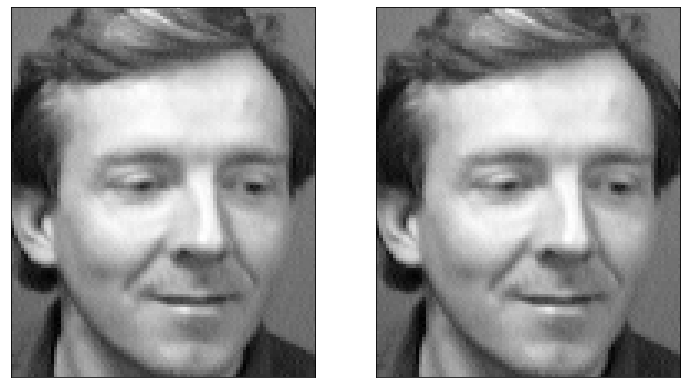

In [5]:
fix, ax = plt.subplots(1, 2, 
    figsize=(12,12),
    subplot_kw = {'xticks' : [], 'yticks':[]}
)

ax[0].imshow(im_original, cmap = "gray")
ax[1].imshow(im, cmap = "gray")

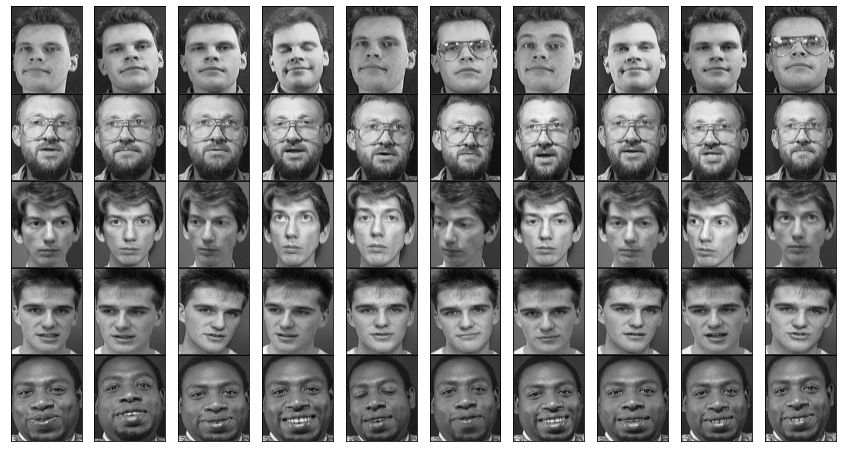

In [6]:
from glob import iglob

caras = pd.DataFrame([])

for path in iglob('./imagenes/*/*.pgm'):
    im = imageio.imread(path)
    cara = pd.Series(im.flatten(), name=path)
    caras = caras.append(cara)
    
fig, axes = plt.subplots(5, 10,
    figsize=(15,8),
    subplot_kw = {'xticks' : [], 'yticks':[]},
    gridspec_kw = dict(hspace = 0.01, wspace = 0.01)
)

for i, ax in enumerate(axes.flat):
    ax.imshow(caras.iloc[i].values.reshape(112,92), cmap = "gray")

# Apliquemos PCA a un conjunto de imágenes
Reduciendo las dimensiones

In [7]:
from sklearn.decomposition import PCA

## Conservar el 50% de la variacion de los datos.

Lo que sea necesario para quedarme el 50% de la variacion de los datos.

In [8]:
caras_pca = PCA(n_components = 0.50)

caras_pca.fit(caras)

PCA(n_components=0.5)

Tenemos solo ``50`` componentes.

**Esto nos quiere decir que si** queremos tener el 50% de la informacion nos alcanza con quedarnos con 6 de estas imagenes, pero no estamos viendo el efecto que tiene reproducir todas nuestras imagenes en funcion de estas 6.

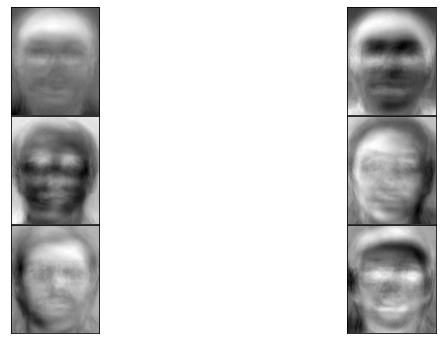

In [9]:
filas = 3
columnas = caras_pca.n_components_ // filas
fig, axes = plt.subplots(filas, columnas,
    figsize= (12, 6),
    subplot_kw = {'xticks': [], 'yticks': []},
    gridspec_kw = dict(hspace = 0.01, wspace = 0.01)
)

for i, ax in enumerate(axes.flat):
    ax.imshow(caras_pca.components_[i].reshape(112,92), cmap = "gray")

La cantidad de componentes que esta utilizando

In [10]:
print(caras_pca.n_components_)

6


In [11]:
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)

Solo vamos a mostrar 5 sujetos con 10 imagenes.

Si conservamos el 50% de la informacion podemos distinguir algunos rostos.

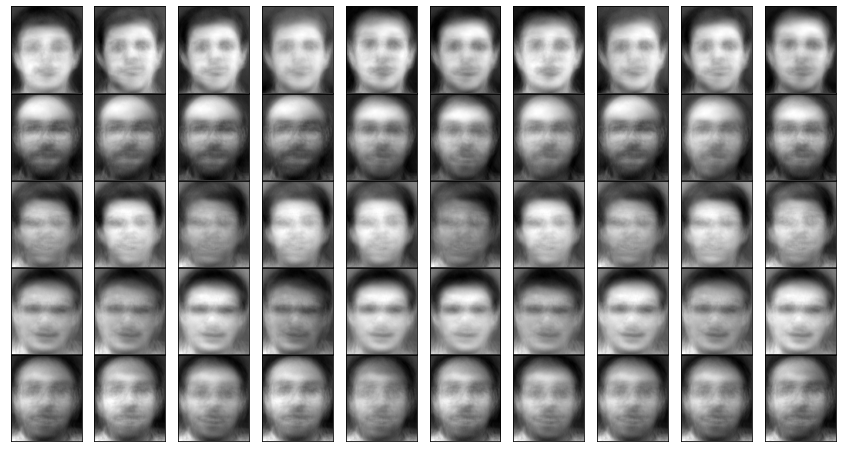

In [12]:
fig, axes = plt.subplots(5, 10, 
    figsize=(15, 8),
    subplot_kw = {'xticks' : [], 'yticks':[]},
    gridspec_kw = dict(hspace = 0.01, wspace = 0.01)
)

for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(112,92), cmap = "gray")

## Conservar el 80% de la variacion de los datos.

In [13]:
caras_pca = PCA(n_components = 0.80)

caras_pca.fit(caras)

PCA(n_components=0.8)

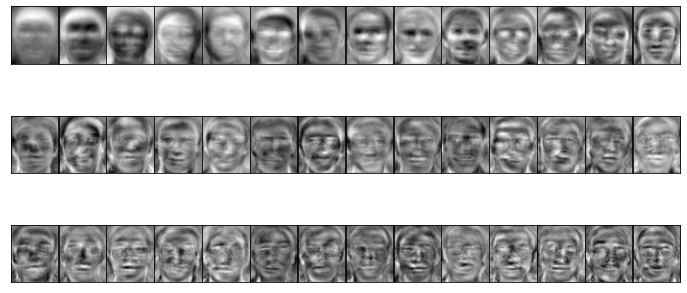

In [14]:
filas = 3
columnas = caras_pca.n_components_ // filas
fig, axes = plt.subplots(filas, columnas,
    figsize= (12, 6),
    subplot_kw = {'xticks': [], 'yticks': []},
    gridspec_kw = dict(hspace = 0.01, wspace = 0.01)
)

for i, ax in enumerate(axes.flat):
    ax.imshow(caras_pca.components_[i].reshape(112,92), cmap = "gray")

In [15]:
print(caras_pca.n_components_)

44


Conservado el 80% de los datos es suficiente para reconocer a los rostros

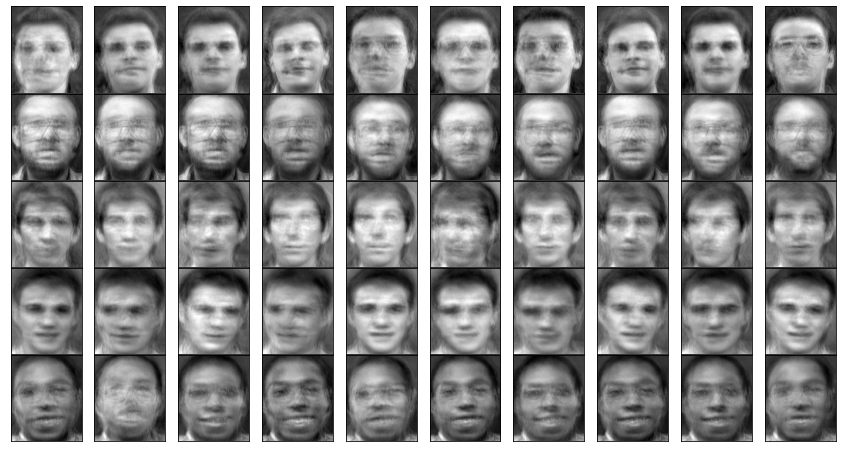

In [16]:
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)

fig, axes = plt.subplots(5, 10, 
    figsize=(15, 8),
    subplot_kw = {'xticks' : [], 'yticks':[]},
    gridspec_kw = dict(hspace = 0.01, wspace = 0.01)
)

for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(112,92), cmap = "gray")

## Conservar el 99.9% de la variacion de los datos.

In [21]:
caras_pca = PCA(n_components = 0.999)

caras_pca.fit(caras)

PCA(n_components=0.999)

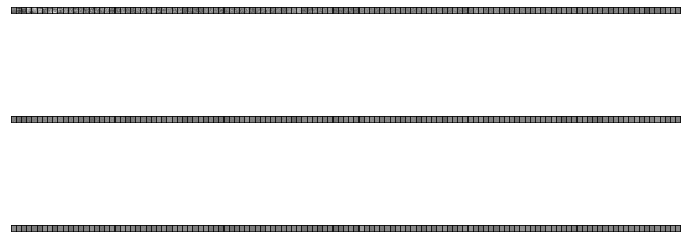

In [22]:
filas = 3
columnas = caras_pca.n_components_ // filas
fig, axes = plt.subplots(filas, columnas,
    figsize= (12, 6),
    subplot_kw = {'xticks': [], 'yticks': []},
    gridspec_kw = dict(hspace = 0.01, wspace = 0.01)
)

for i, ax in enumerate(axes.flat):
    ax.imshow(caras_pca.components_[i].reshape(112,92), cmap = "gray")

In [23]:
print(caras_pca.n_components_)

388


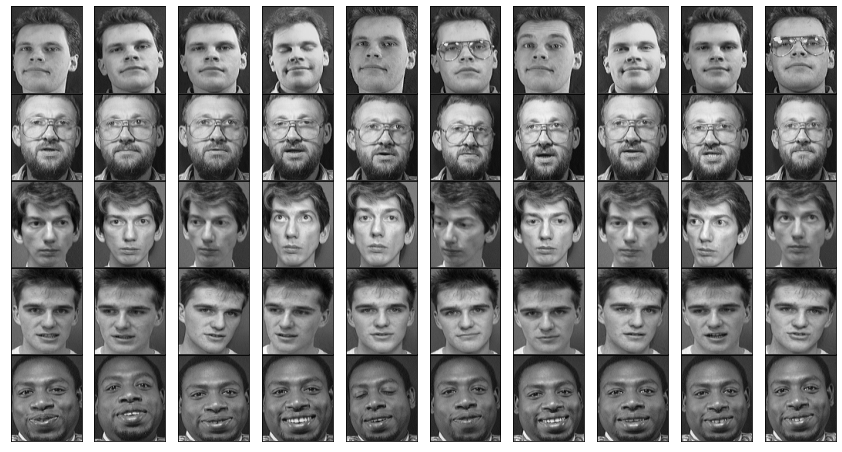

In [24]:
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)
fig, axes = plt.subplots(5, 10, 
    figsize=(15, 8),
    subplot_kw = {'xticks' : [], 'yticks':[]},
    gridspec_kw = dict(hspace = 0.01, wspace = 0.01)
)

for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(112,92), cmap = "gray")

# Conclusion:
Con un conjunto de datos muy pequeño el aumentar la cantidad de informacion que queremos conservar aumenta drasticamente el tiempo de computacion que necesitamos para obtener el mismo tipo de resultado.
